# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [1]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [2]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby('bird_name')
#grouped_birds.head()



# Now calculate the mean of `speed_2d` using the `mean()` function.
#mean_speeds = np.mean( birddata.speed_2d[ grouped_birds ] )
# see cdb: 5639
mean_speeds = np.mean( birddata.speed_2d )

# question 1
# mean_speeds = np.mean( birddata.speed_2d[birddata.bird_name == 'Sanne'] )
# print( mean_speeds )

# Find the mean `altitude` for each bird.
mean_altitudes = np.mean( birddata.altitude )

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [3]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime( birddata.date_time )

# Create a new column of day of observation
#birddata["date"] = birddata.date_time
birddata["date"] = birddata.date_time.dt.date

# Use `groupby()` to group the data by date.
#grouped_bydates = birddata.groupby(birddata.date_time)
grouped_bydates = birddata.groupby("date")

#grouped_bydates.head()

# question 2
#ind = np.isnan(birddata.altitude)
#mean_alts = np.mean( birddata.altitude )
#mean_alts = np.mean( birddata[~ind].altitude[birddata[~ind]['date'] == '2013-09-12'] )
#mean_alts
#balts = np.mean( birddata.altitude[~ind] )

#balts

#balts.head()
#mean_alts = np.mean( birddata.altitude[birddata.date == '2013-09-12'] )

#mean_alts = np.mean( balts[birddata.date == '2013-09-12'] )

#print( mean_alts )

#grouped_bydates = birddata.groupby("date")
# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()
#mean_altitudes_perday["date" == '2013-08']

mean_altitudes_perday #[12]
# WRONG: 134.092

# this helped me get it
#mean_altitudes_perday.head(35)

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.954545
Name: altitude, Length: 259, dtype: float64

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [4]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name", "date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()

mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

In [5]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"] # Enter your code here.
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"] # Enter your code here.
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"] # Enter your code here.

# this was how to get the question right!
nico_daily_speed.tail(50)




date
2014-03-12     2.707914
2014-03-13     2.853118
2014-03-14     2.333892
2014-03-15     2.849500
2014-03-16     2.520370
2014-03-17     2.739105
2014-03-18     3.468390
2014-03-19     2.730760
2014-03-20     2.718993
2014-03-21     2.512176
2014-03-22     3.277353
2014-03-23     2.400540
2014-03-24     3.338499
2014-03-25     2.348788
2014-03-26     2.421999
2014-03-27     2.944375
2014-03-28     2.833248
2014-03-29     3.550028
2014-03-30     2.176832
2014-03-31     2.824631
2014-04-01     3.163723
2014-04-02     2.861222
2014-04-03     3.212099
2014-04-04     2.832465
2014-04-05     3.283842
2014-04-06     2.824700
2014-04-07     3.455989
2014-04-08     2.995421
2014-04-09     3.780186
2014-04-10     3.703409
2014-04-11     2.829536
2014-04-12     3.341111
2014-04-13     3.878121
2014-04-14     3.882314
2014-04-15     4.437659
2014-04-16     3.366451
2014-04-17     3.713230
2014-04-18     3.798646
2014-04-19     5.061530
2014-04-20    10.196981
2014-04-21     7.861385
2014-04-22 

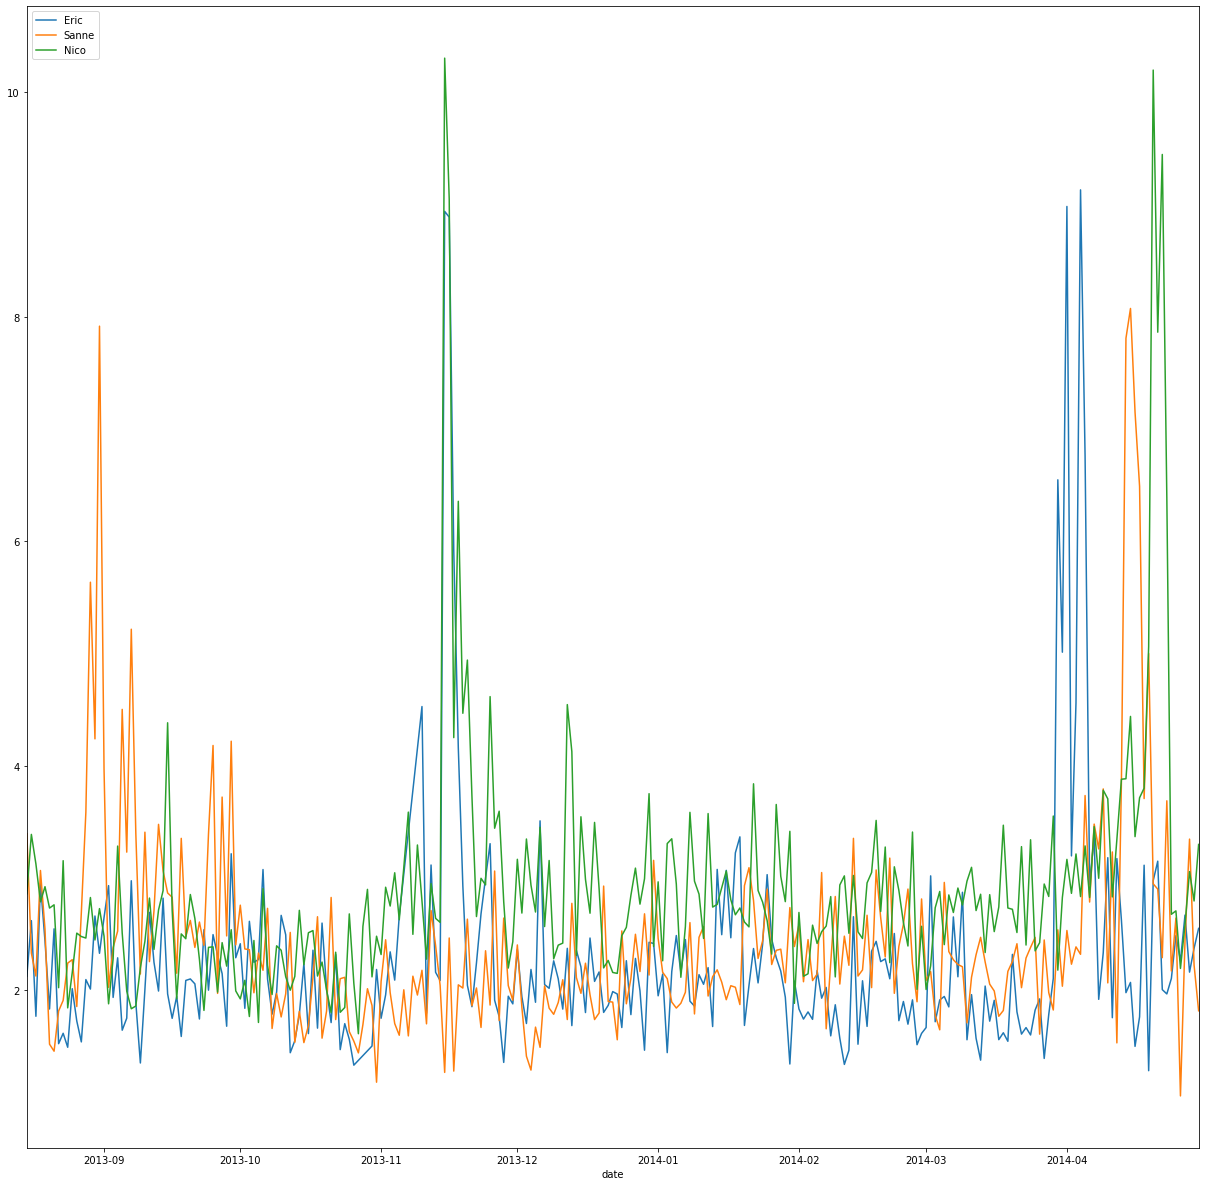

In [6]:
plt.figure(figsize=(21,21))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()